In [1]:
from pylab import *
import nylib, nylib2, cjlib
%matplotlib inline

# plot the data along with the fits
import bloch
import pulse

In [2]:

pulse_delays = np.linspace(0.1, 0.001, num=101)
pulse_amplitudes = linspace(0.01, 5., num=101)
exchange_rates = r_[30., 260., 1100., 5500.]


In [ ]:
# saturation factor
cestFreq = r_[3000.5]
macromolecular = bloch.Pool('macromolecular', t1 = 1, t2 = 9e-6, lifetime = 1/40.,  chemical_shift = 0.0001, concentration = 0.001)
freewater = bloch.Pool('freewater', t1 = 1.6, t2 = 0.062, lifetime = 1., chemical_shift = -0.0001, concentration = 111200)


saturation_factors = zeros((len(exchange_rates), len(pulse_amplitudes), len(pulse_delays), 2))
for ij, ei in enumerate(exchange_rates):
    sol1 = bloch.Pool('sol1', t1 = 1, t2 = 0.1, lifetime = 1/ei,  chemical_shift = 3000.5, concentration = 72.)
    pools = (freewater, sol1, macromolecular)
    for ii, pa in enumerate(pulse_amplitudes):
        for ik, pdl in enumerate(pulse_delays):
            pd = 0.1
            satPulseBp = pulse.returnPulse('bp', pd, pdl, flipAngle=None, pulseAmplitude=pa)
            pulseRepeats = int(4/(pdl+pd))
    #         print(pulseRepeats)
            saturation_factors[ij, ii, ik] = bloch.solve(pools, cestFreq, satPulseBp, crusher=False, magnetic_field=7.0,
                         pulse_repeat = int(pulseRepeats), post_dynamic_delay=inf)[2*len(pools):2*len(pools)+2,0,-1]


In [4]:
save_dir = '/Volumes/T7/CEST_labeling/data/'
from scipy.io import savemat
savemat(save_dir + 'simulationMatrix_duty_cycle_7T.mat', {'Data':saturation_factors})


In [5]:
# save_dir = '/Volumes/T7/CEST_labeling/data/'
# from scipy.io import loadmat
# saturation_factors=loadmat(save_dir + 'simulationMatrix_duty_cycle_7T_20230215.mat')['Data']


# saturation efficiency

In [6]:
from matplotlib.colors import LogNorm

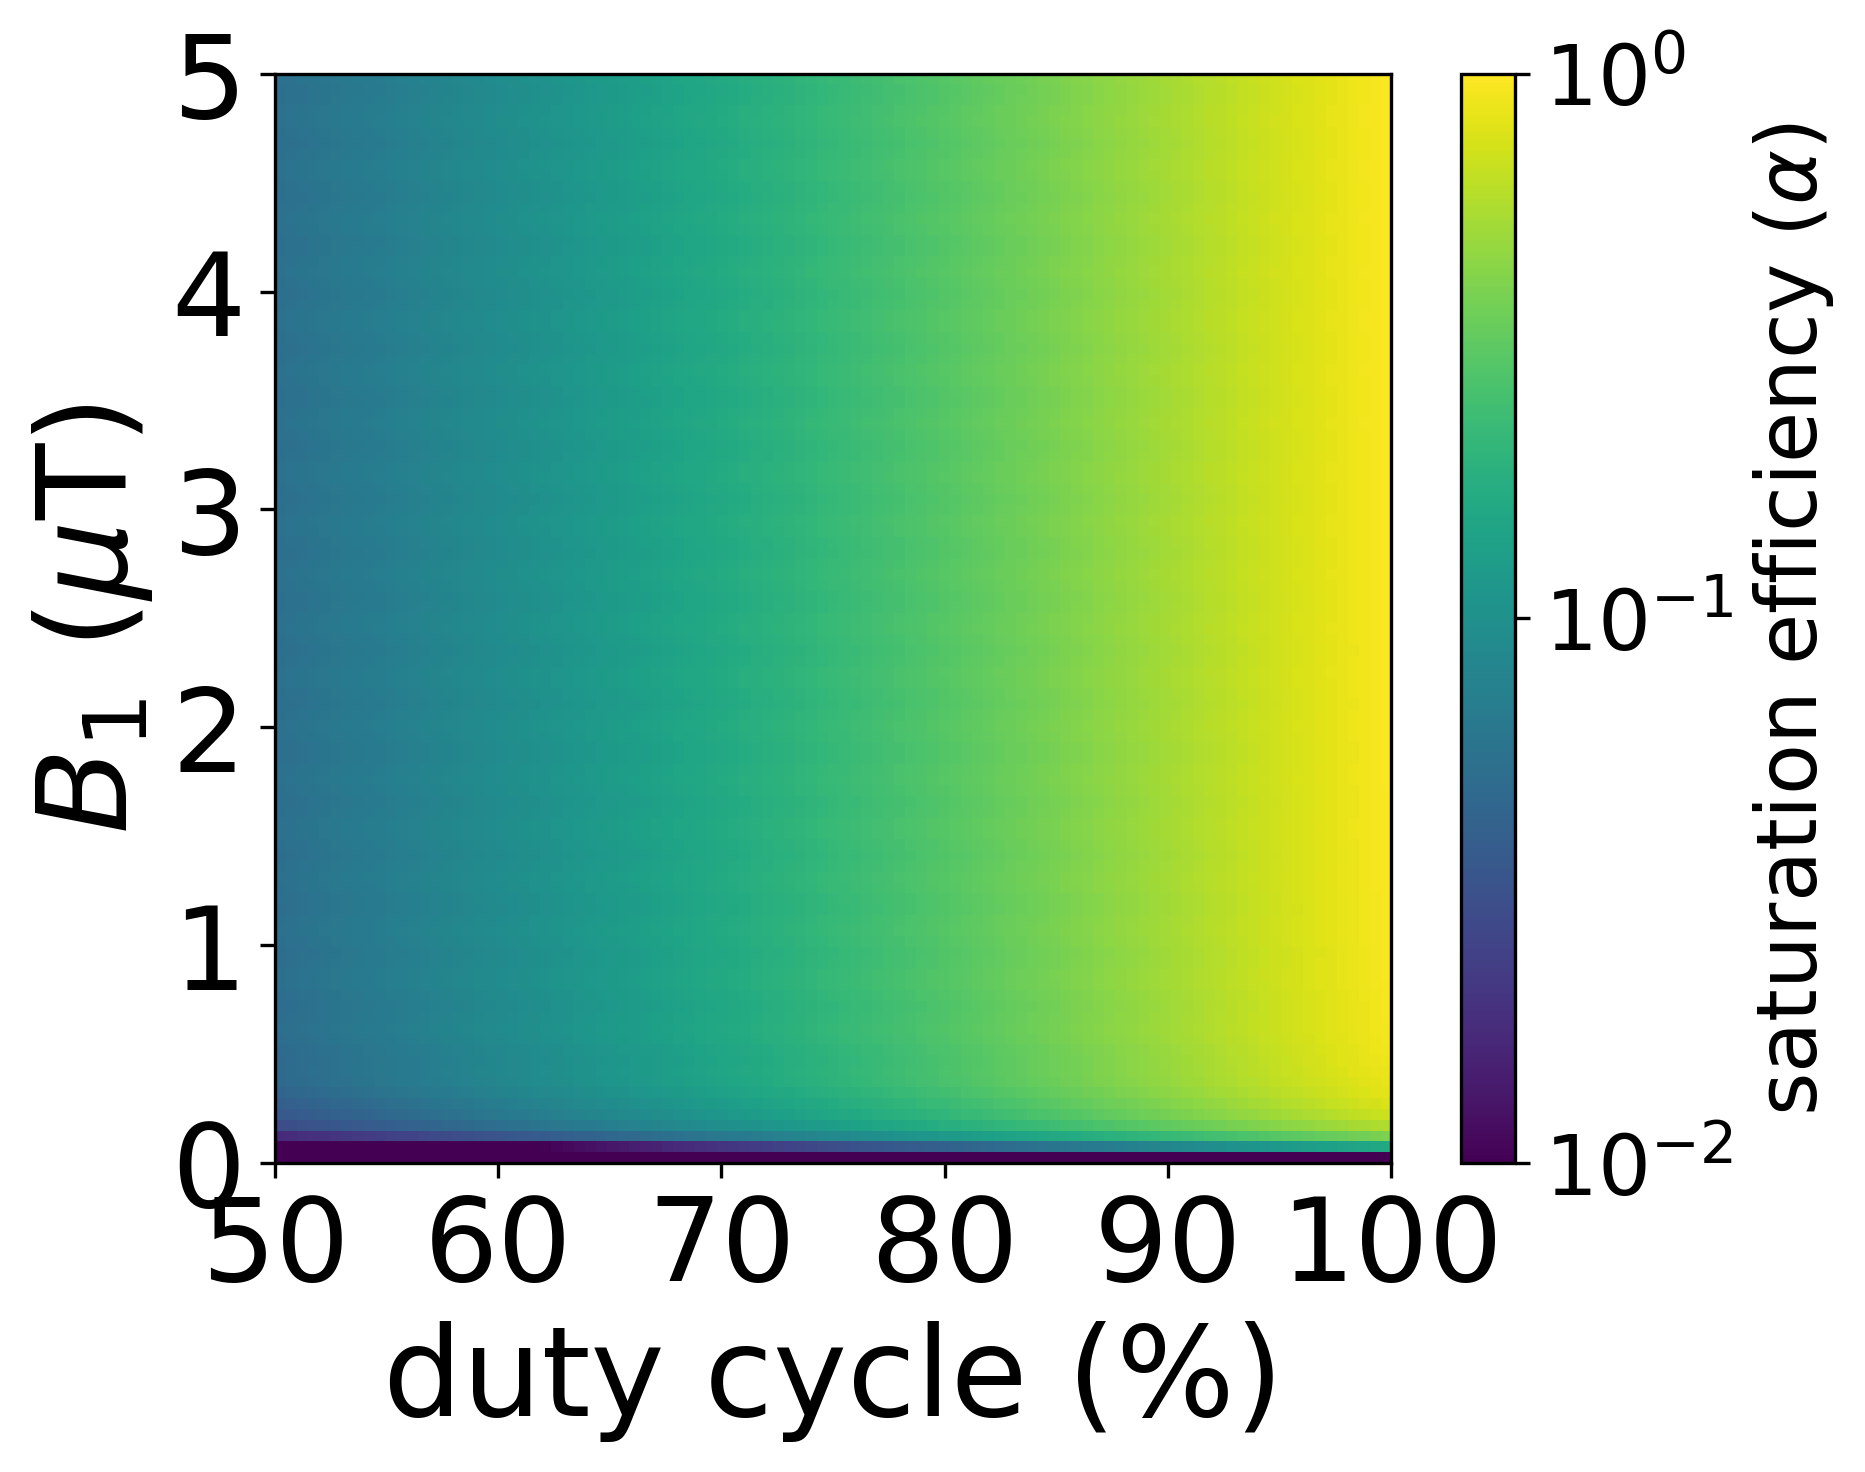

In [17]:
# contourf(X, Y, max_contrast[2], 5, cmap='RdGy')
fig, ax = plt.subplots(figsize=(6,4.81),dpi=300)

X=pulse_delays
Y=pulse_amplitudes

im = ax.imshow(1-(112000/72.)*saturation_factors[0, :,:,1], norm=LogNorm(vmin=0.01, vmax=1), extent=[50,100,0,5.], aspect='auto', origin='lower')

ax.set_facecolor("#440154FF")
cbar = fig.colorbar(im, ticks=[0.01, 0.1,1])
cbar.ax.tick_params(labelsize=20) 
cbar.set_label(r'saturation efficiency ($\alpha$)', fontsize=20)

y_label_list = [' ',' ','  ',' ',' ',' ']
ax.set_yticklabels(y_label_list, fontsize=28)
x_label_list = [' ',' ',' ','  ','  ',' ']
ax.set_xticklabels(x_label_list, fontsize=28)

y_label_list = ['0','1','2','3','4','5']
ax.set_yticklabels(y_label_list, fontsize=28)
x_label_list = ['50','60','70','80','90','100']
ax.set_xticklabels(x_label_list, fontsize=28)

plt.ylabel('$B$$_{1}}$ ($\mu$T)', fontsize=30)
plt.xlabel('duty cycle (%)', fontsize=30)
# plt.title('saturation efficiency ($\\alpha$)', fontsize=25)
# l(r'$\lambda$')

plt.show()


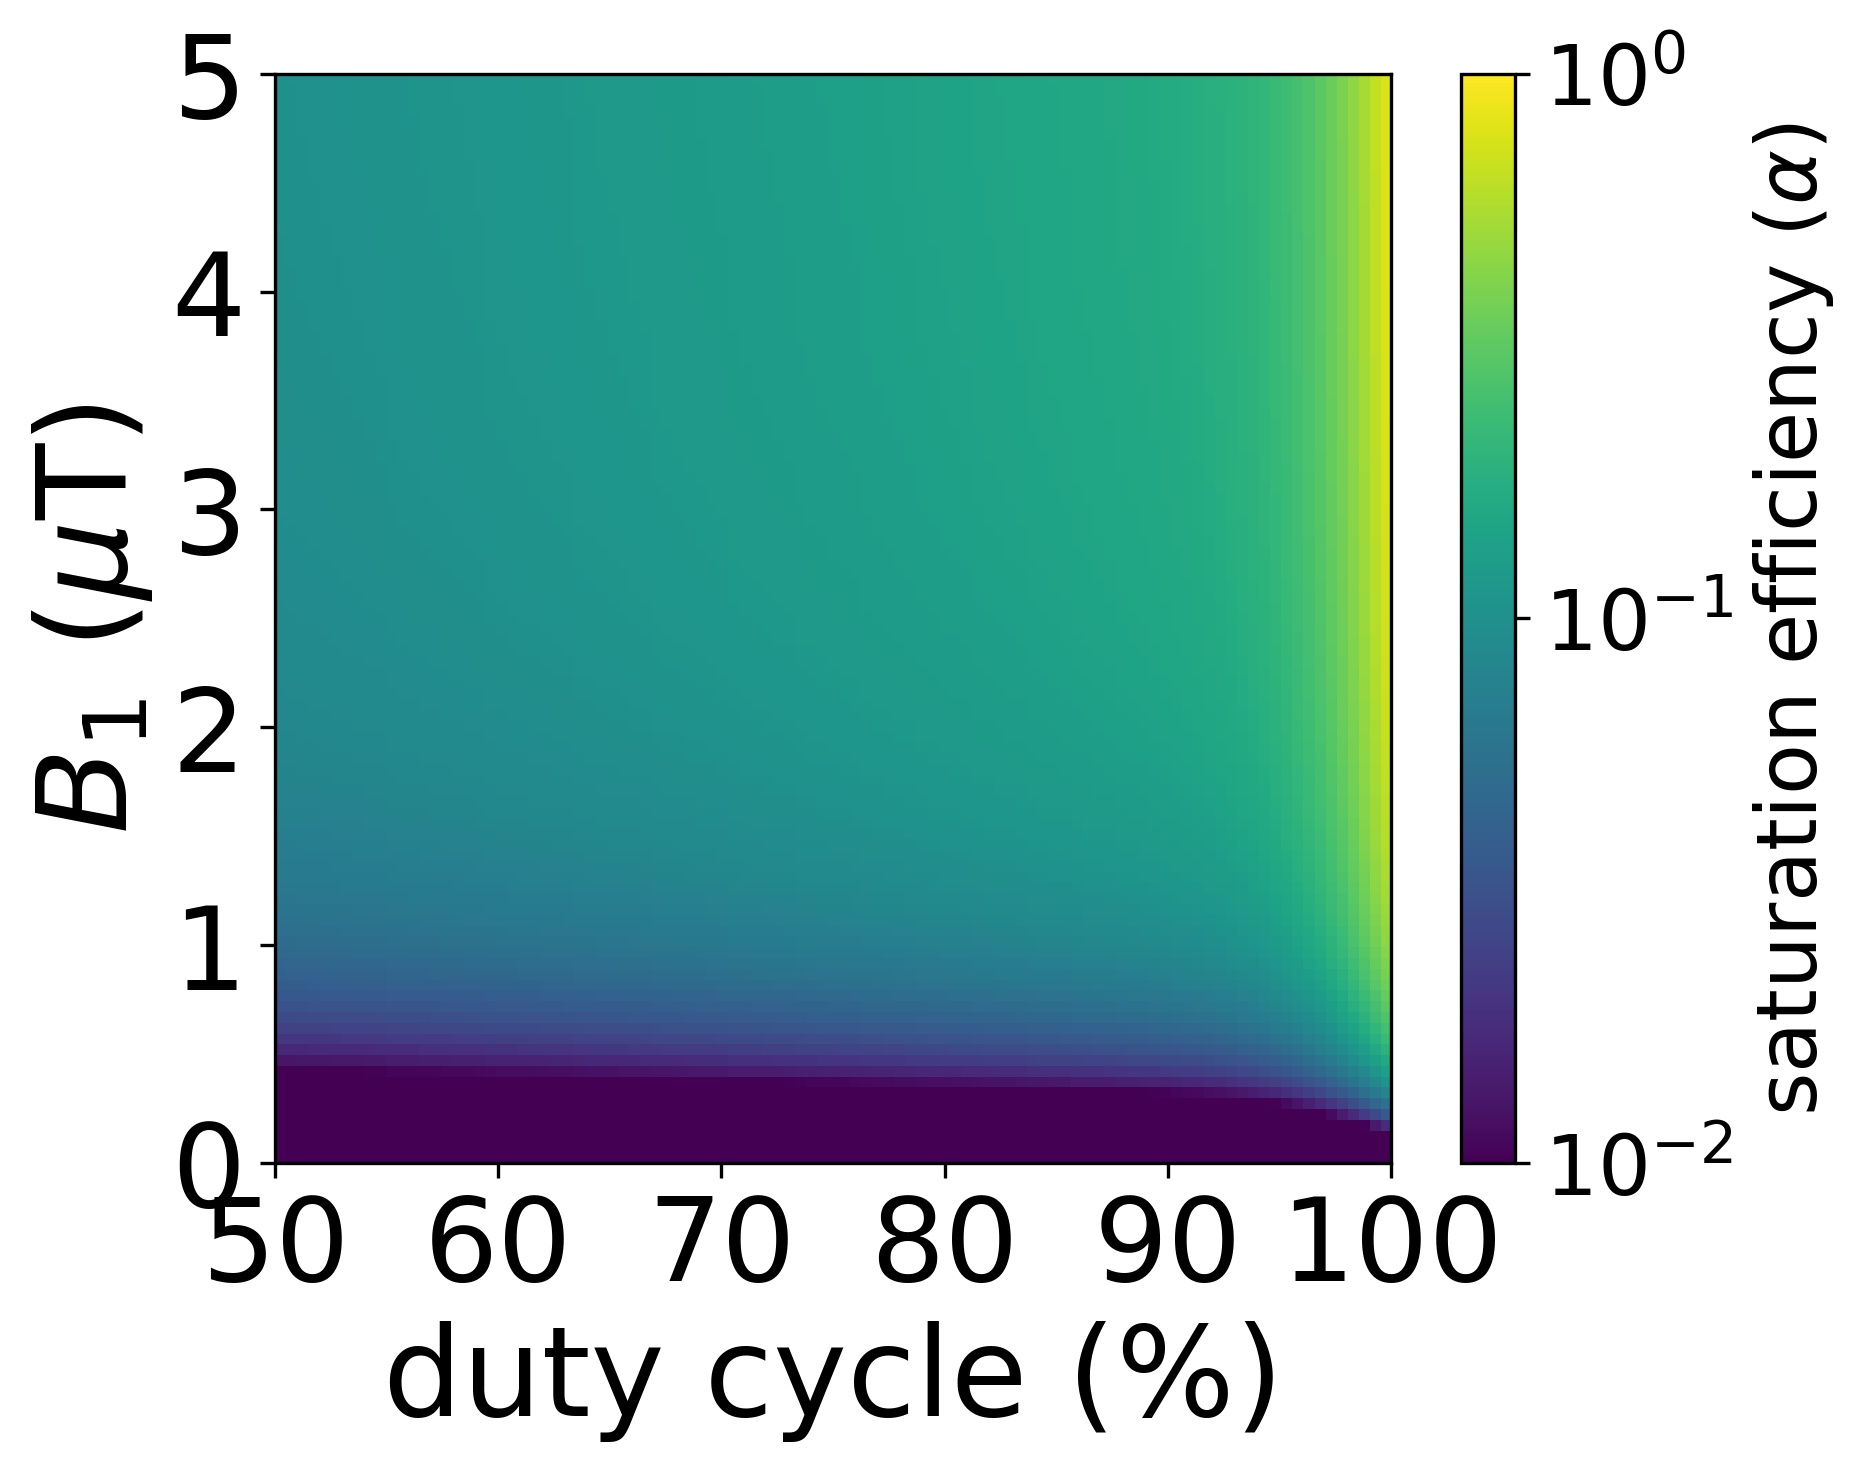

In [18]:
# contourf(X, Y, max_contrast[2], 5, cmap='RdGy')
fig, ax = plt.subplots(figsize=(6,4.81),dpi=300)

X=pulse_delays
Y=pulse_amplitudes

im = ax.imshow(1-(112000/72.)*saturation_factors[1, :,:,1], norm=LogNorm(vmin=0.01, vmax=1), extent=[50,100,0,5.], aspect='auto', origin='lower')

ax.set_facecolor("#440154FF")
cbar = fig.colorbar(im, ticks=[0.01, 0.1,1])
cbar.ax.tick_params(labelsize=20) 
cbar.set_label(r'saturation efficiency ($\alpha$)', fontsize=20)

# y_label_list = [' ',' ','  ',' ',' ',' ']
# ax.set_yticklabels(y_label_list, fontsize=28)
# x_label_list = [' ',' ',' ','  ','  ',' ']
# ax.set_xticklabels(x_label_list, fontsize=28)

y_label_list = ['0','1','2','3','4','5']
ax.set_yticklabels(y_label_list, fontsize=28)
x_label_list = ['50','60','70','80','90','100']
ax.set_xticklabels(x_label_list, fontsize=28)

plt.ylabel('$B$$_{1}}$ ($\mu$T)', fontsize=30)
plt.xlabel('duty cycle (%)', fontsize=30)
# plt.title('saturation efficiency ($\\alpha$)', fontsize=25)
# l(r'$\lambda$')

plt.show()


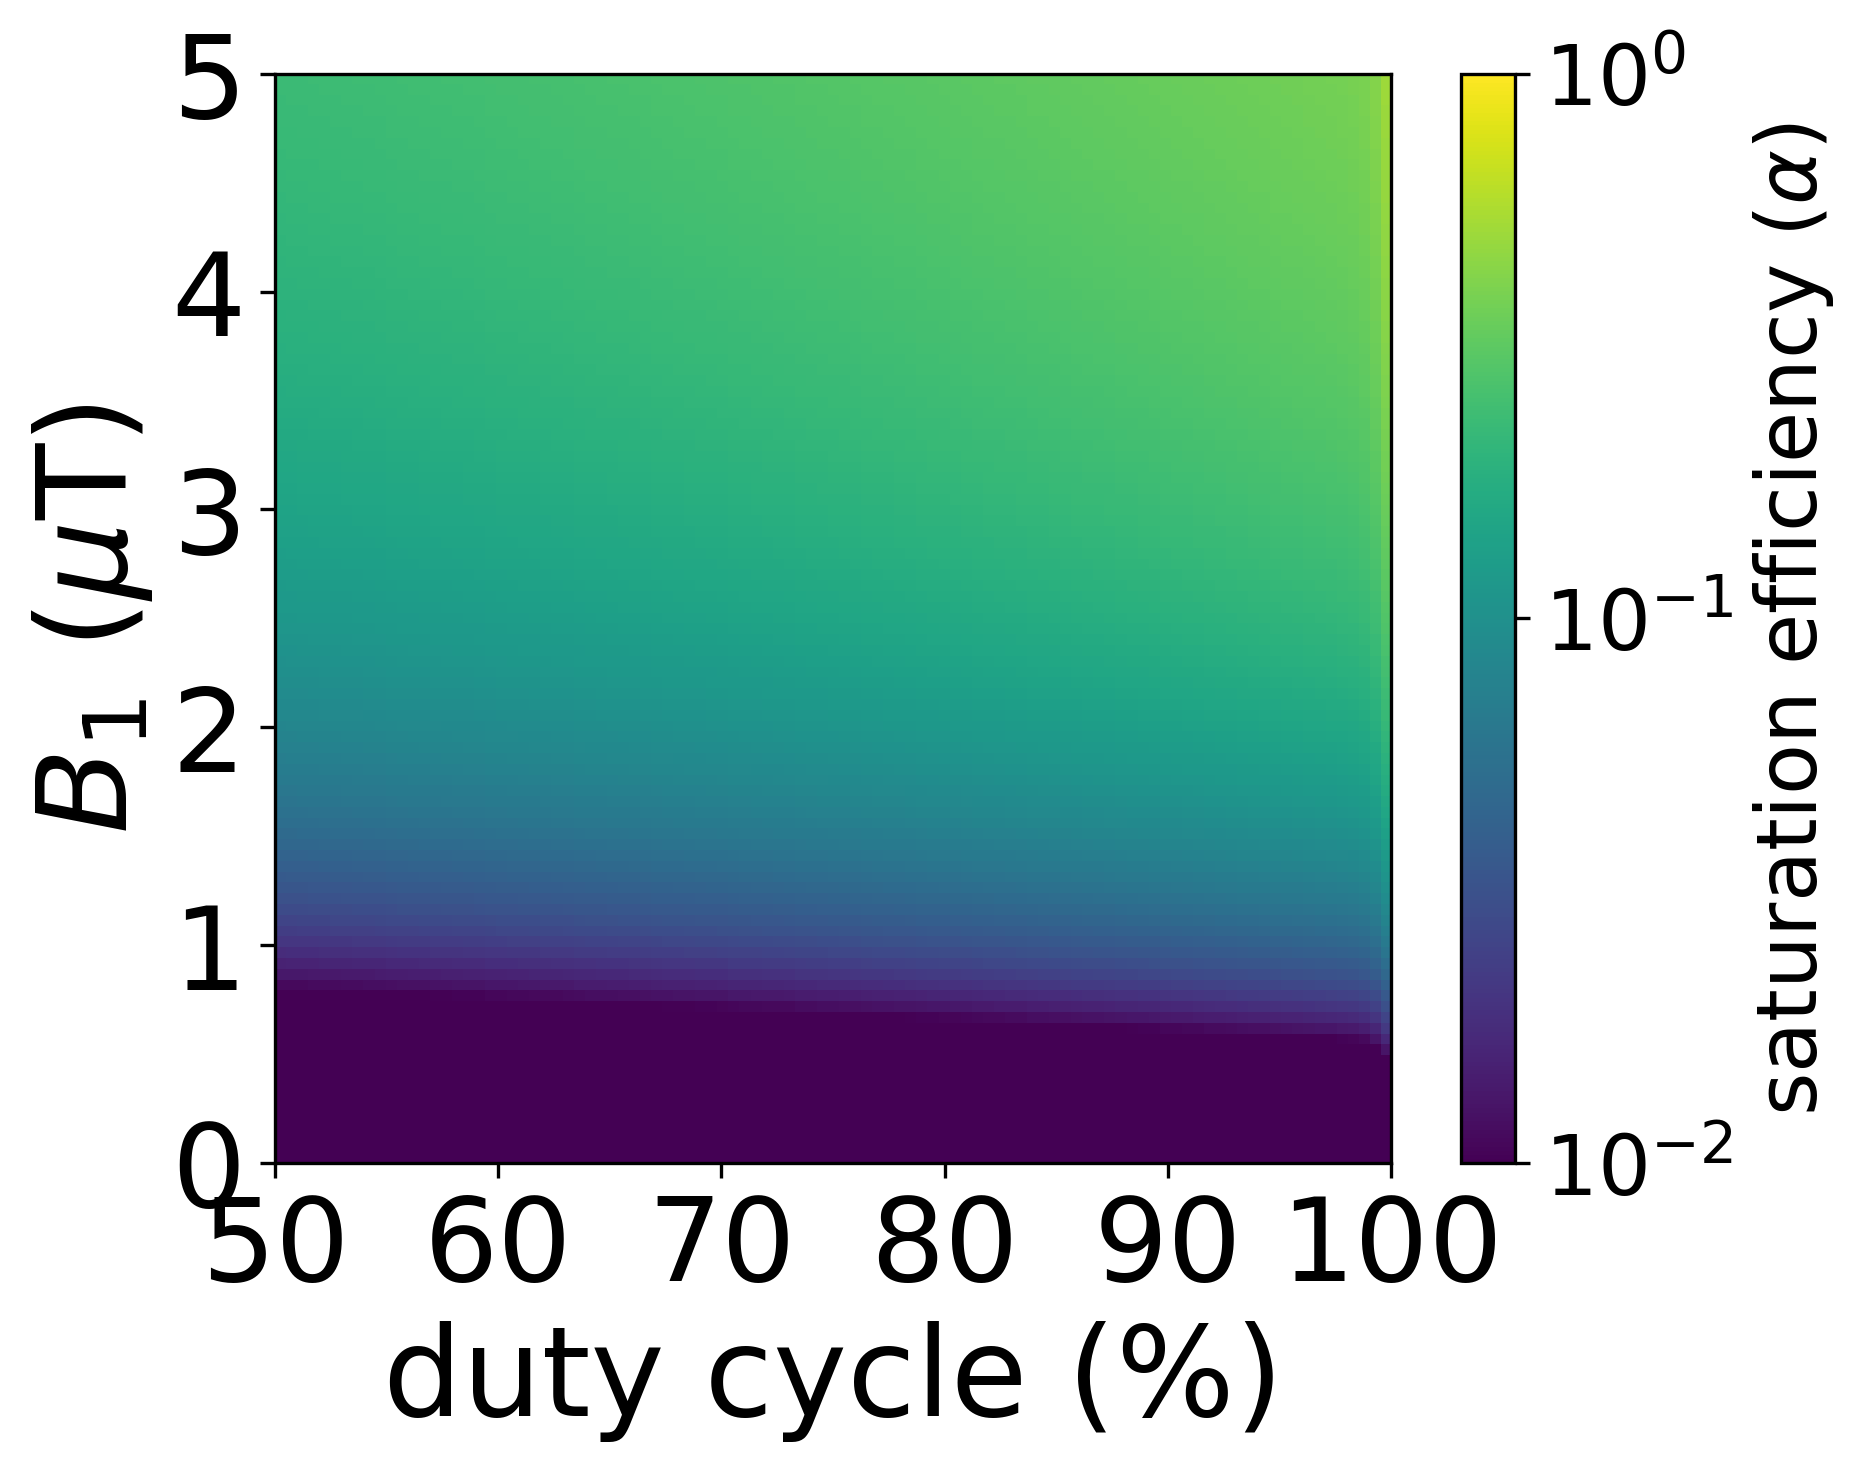

In [19]:
# contourf(X, Y, max_contrast[2], 5, cmap='RdGy')
fig, ax = plt.subplots(figsize=(6,4.81),dpi=300)

X=pulse_delays
Y=pulse_amplitudes

im = ax.imshow(1-(112000/72.)*saturation_factors[2, :,:,1], norm=LogNorm(vmin=0.01, vmax=1), extent=[50,100,0,5.], aspect='auto', origin='lower')

ax.set_facecolor("#440154FF")
cbar = fig.colorbar(im, ticks=[0.01, 0.1,1])
cbar.ax.tick_params(labelsize=20) 
cbar.set_label(r'saturation efficiency ($\alpha$)', fontsize=20)

# y_label_list = [' ',' ','  ',' ',' ',' ']
# ax.set_yticklabels(y_label_list, fontsize=28)
# x_label_list = [' ',' ',' ','  ','  ',' ']
# ax.set_xticklabels(x_label_list, fontsize=28)

y_label_list = ['0','1','2','3','4','5']
ax.set_yticklabels(y_label_list, fontsize=28)
x_label_list = ['50','60','70','80','90','100']
ax.set_xticklabels(x_label_list, fontsize=28)

plt.ylabel('$B$$_{1}}$ ($\mu$T)', fontsize=30)
plt.xlabel('duty cycle (%)', fontsize=30)
# plt.title('saturation efficiency ($\\alpha$)', fontsize=25)
# l(r'$\lambda$')

plt.show()


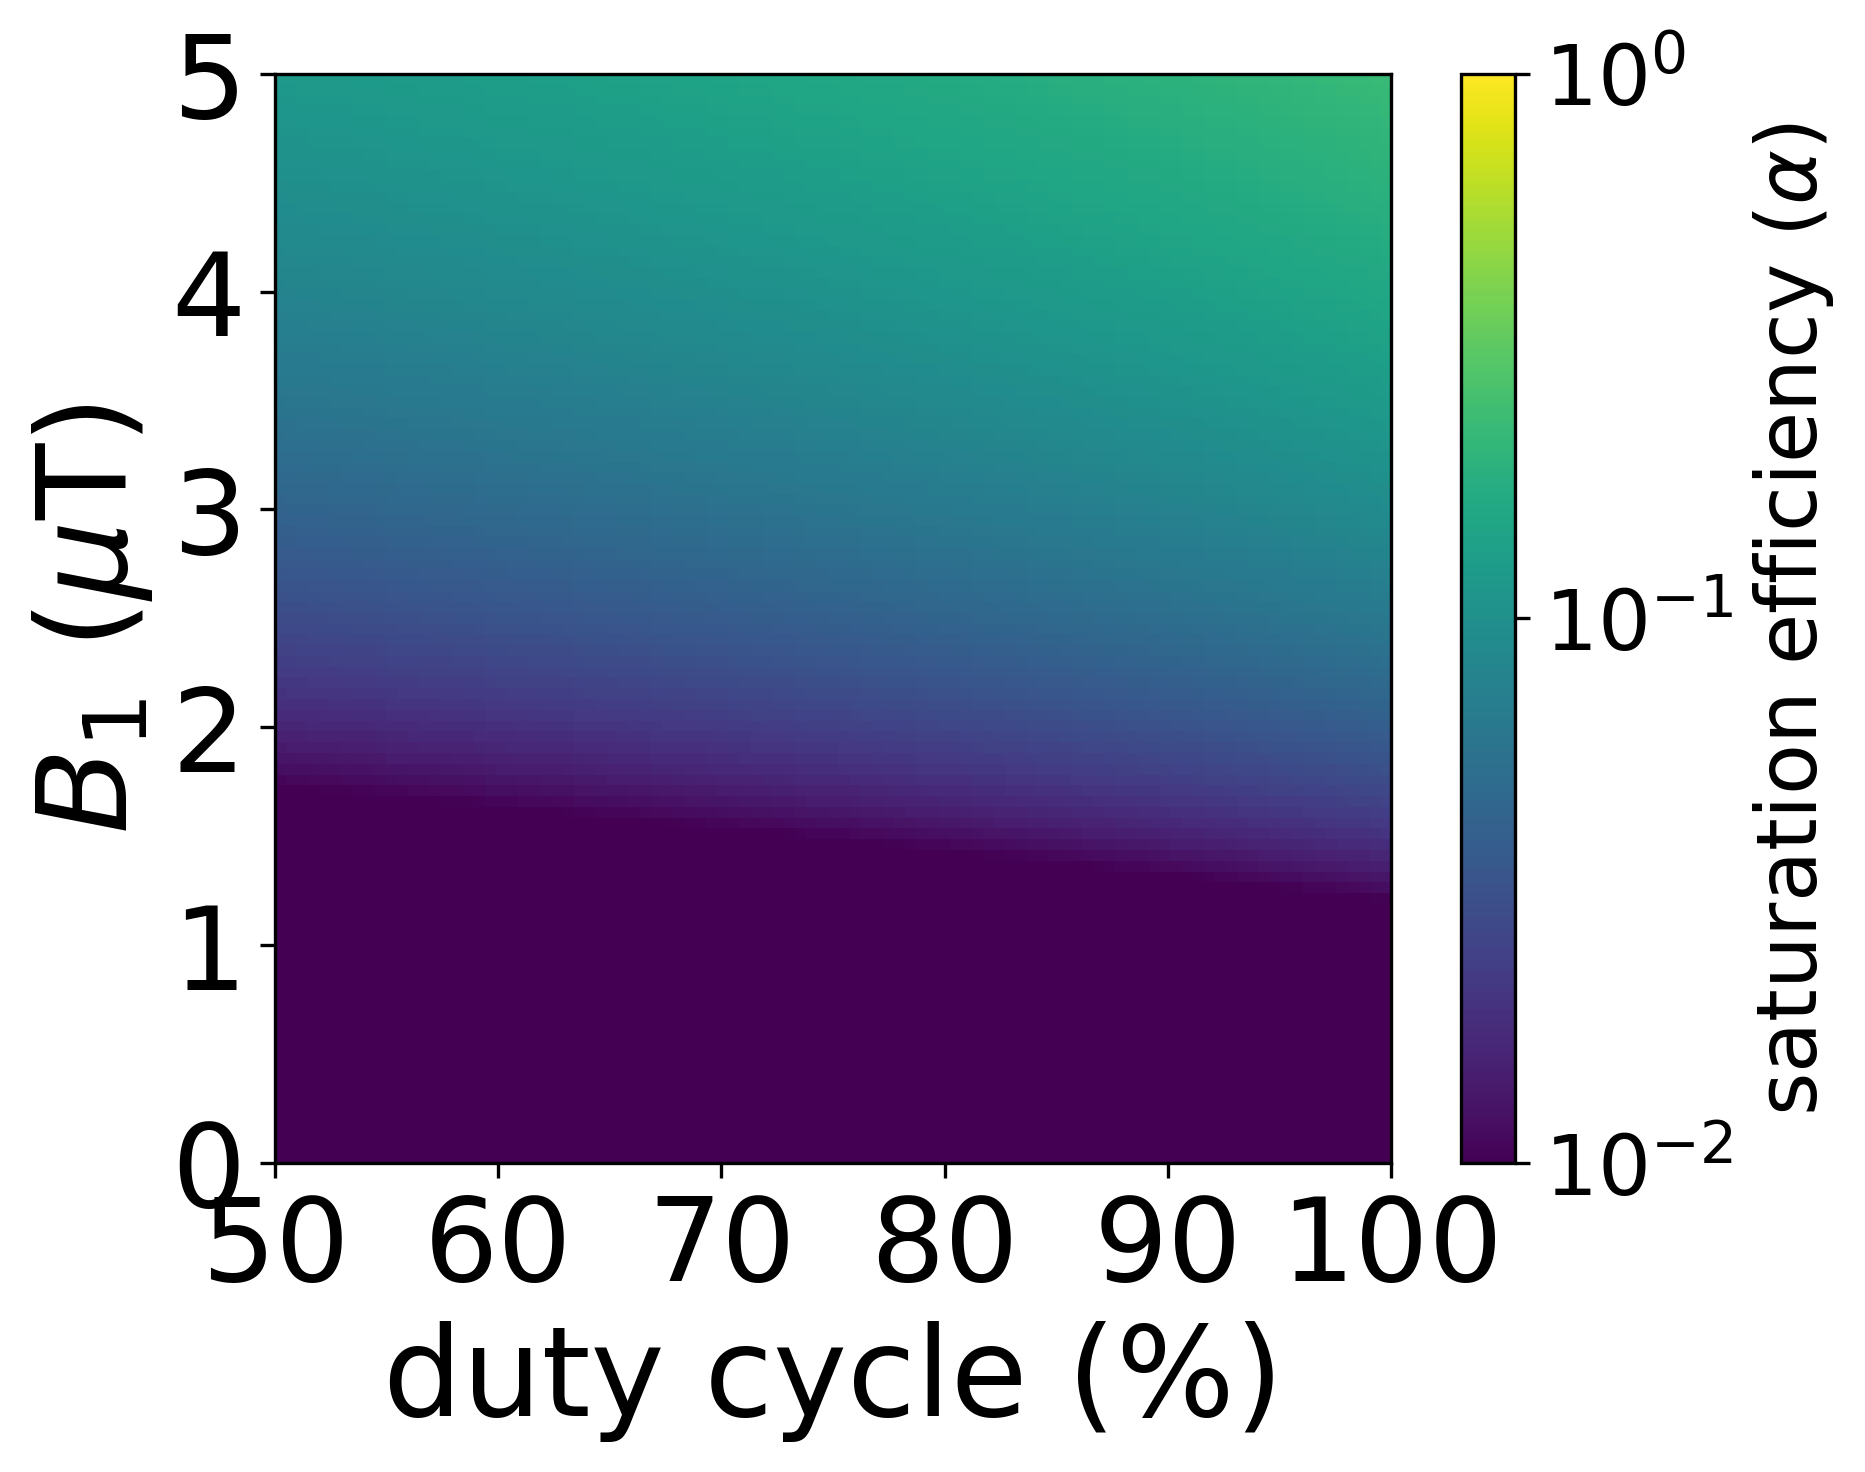

In [20]:
# contourf(X, Y, max_contrast[2], 5, cmap='RdGy')
fig, ax = plt.subplots(figsize=(6,4.81),dpi=300)

X=pulse_delays
Y=pulse_amplitudes

im = ax.imshow(1-(112000/72.)*saturation_factors[3, :,:,1], norm=LogNorm(vmin=0.01, vmax=1), extent=[50,100,0,5.], aspect='auto', origin='lower')

ax.set_facecolor("#440154FF")
cbar = fig.colorbar(im, ticks=[0.01, 0.1,1])
cbar.ax.tick_params(labelsize=20) 
cbar.set_label(r'saturation efficiency ($\alpha$)', fontsize=20)

# y_label_list = [' ',' ','  ',' ',' ',' ']
# ax.set_yticklabels(y_label_list, fontsize=28)
# x_label_list = [' ',' ',' ','  ','  ',' ']
# ax.set_xticklabels(x_label_list, fontsize=28)

y_label_list = ['0','1','2','3','4','5']
ax.set_yticklabels(y_label_list, fontsize=28)
x_label_list = ['50','60','70','80','90','100']
ax.set_xticklabels(x_label_list, fontsize=28)

plt.ylabel('$B$$_{1}}$ ($\mu$T)', fontsize=30)
plt.xlabel('duty cycle (%)', fontsize=30)
# plt.title('saturation efficiency ($\\alpha$)', fontsize=25)
# l(r'$\lambda$')

plt.show()


# PTR (%)

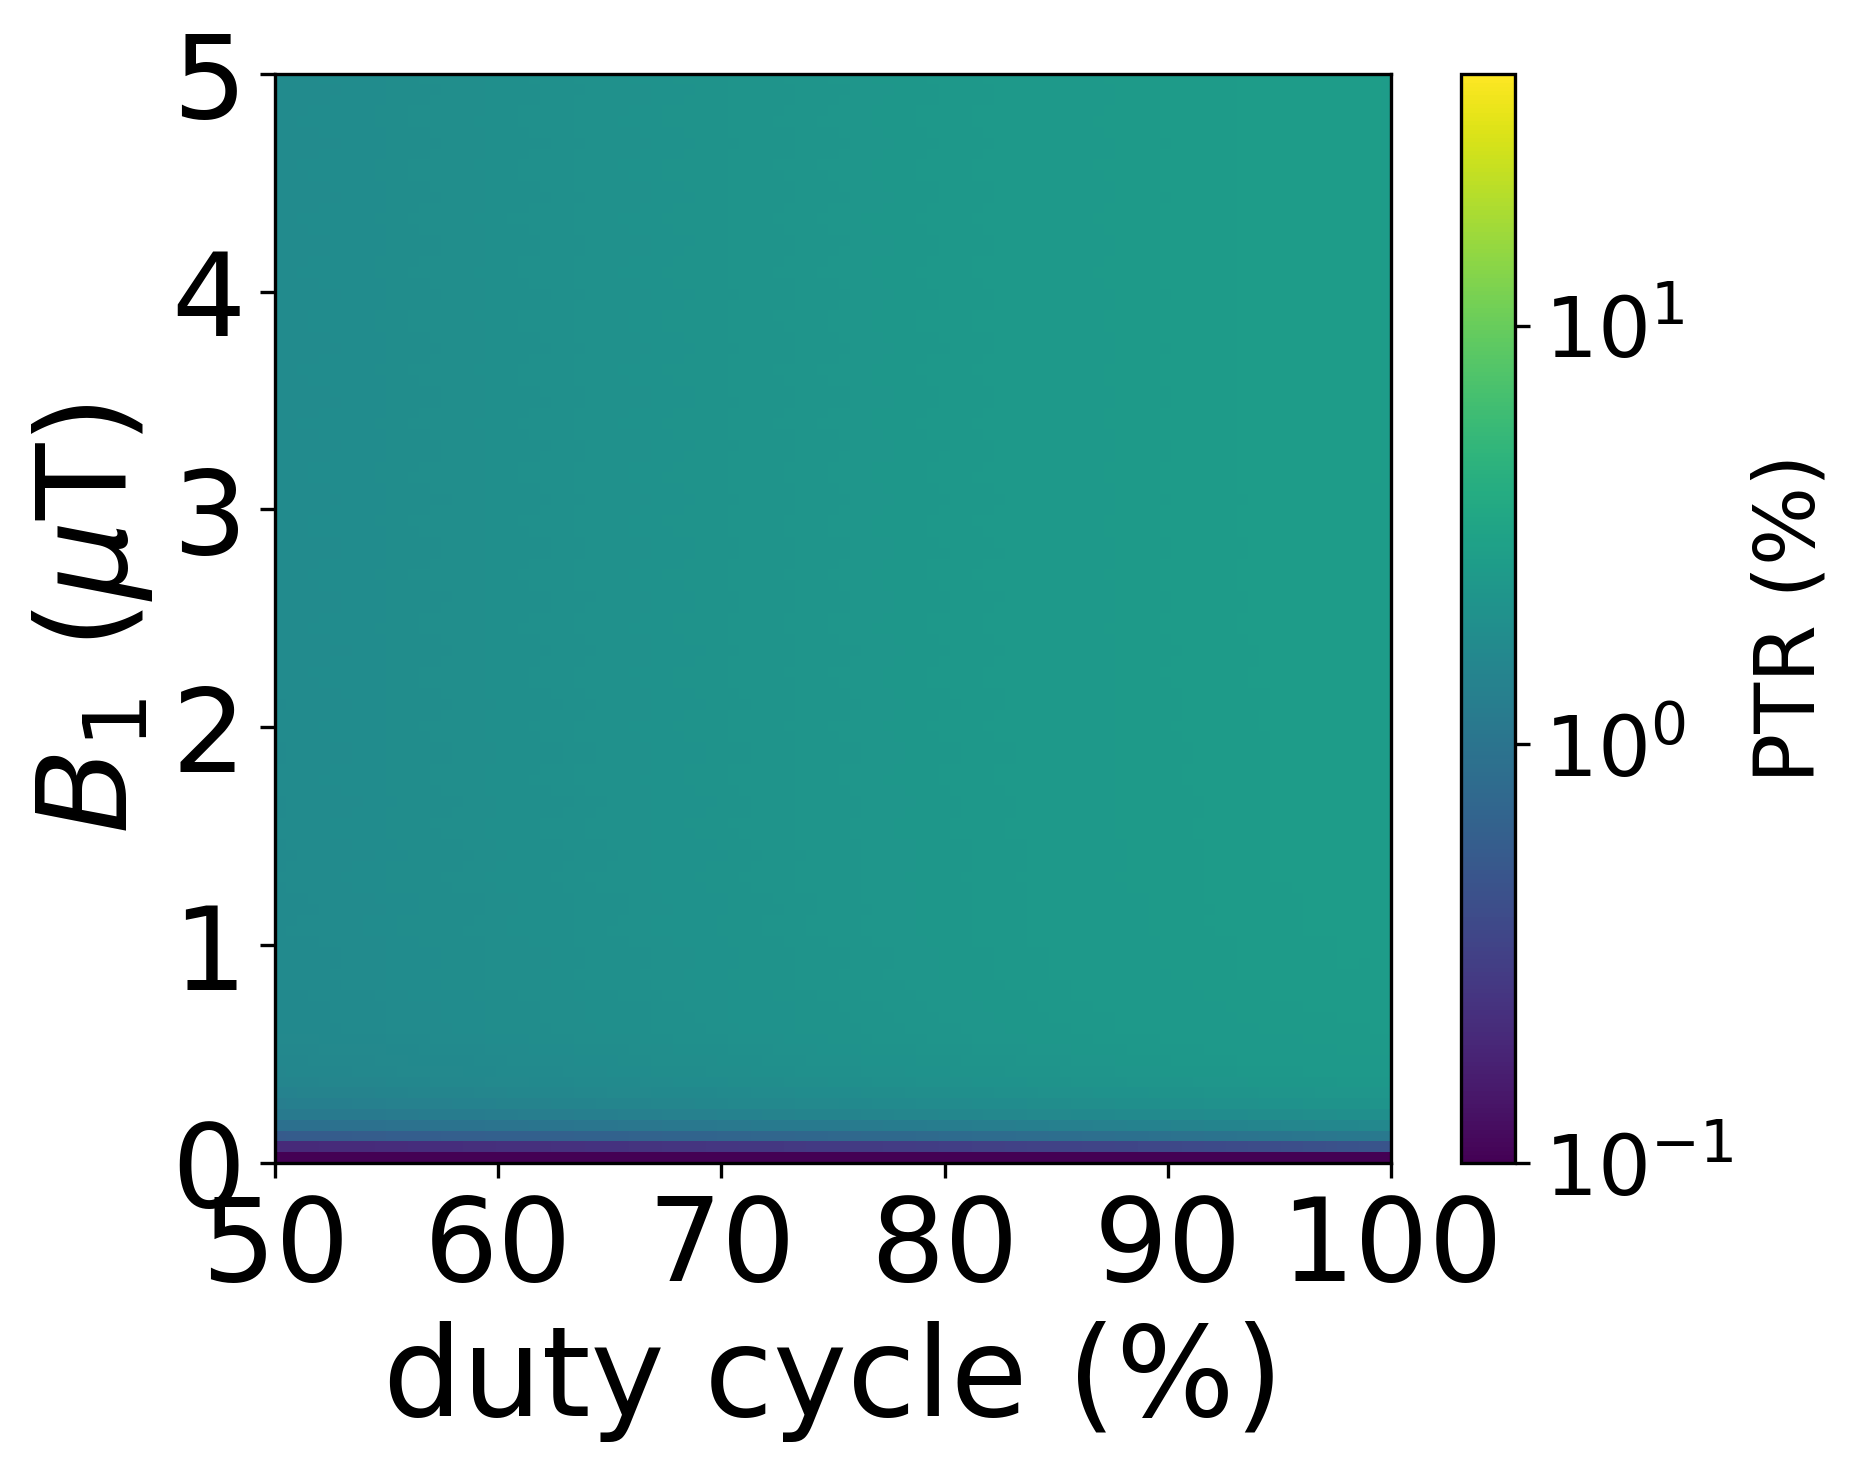

In [21]:
# contourf(X, Y, max_contrast[2], 5, cmap='RdGy')
fig, ax = plt.subplots(figsize=(6,4.81),dpi=300)

X=pulse_delays
Y=pulse_amplitudes

im = ax.imshow(100*(1-saturation_factors[0, :,:,0]), norm=LogNorm(vmin=0.1, vmax=40), extent=[50,100,0,5.], aspect='auto', origin='lower')
ax.set_facecolor("#440154FF")
cbar = fig.colorbar(im, ticks=[0.1,1, 10,100])
cbar.ax.tick_params(labelsize=20) 
cbar.set_label(r'PTR (%)', fontsize=20)

# y_label_list = [' ',' ','  ',' ',' ',' ']
# ax.set_yticklabels(y_label_list, fontsize=28)
# x_label_list = [' ',' ',' ','  ','  ',' ']
# ax.set_xticklabels(x_label_list, fontsize=28)

y_label_list = ['0','1','2','3','4','5']
ax.set_yticklabels(y_label_list, fontsize=28)
x_label_list = ['50','60','70','80','90','100']
ax.set_xticklabels(x_label_list, fontsize=28)


plt.ylabel('$B$$_{1}}$ ($\mu$T)', fontsize=30)
plt.xlabel('duty cycle (%)', fontsize=30)
# plt.title('saturation efficiency ($\\alpha$)', fontsize=25)
# l(r'$\lambda$')

plt.show()


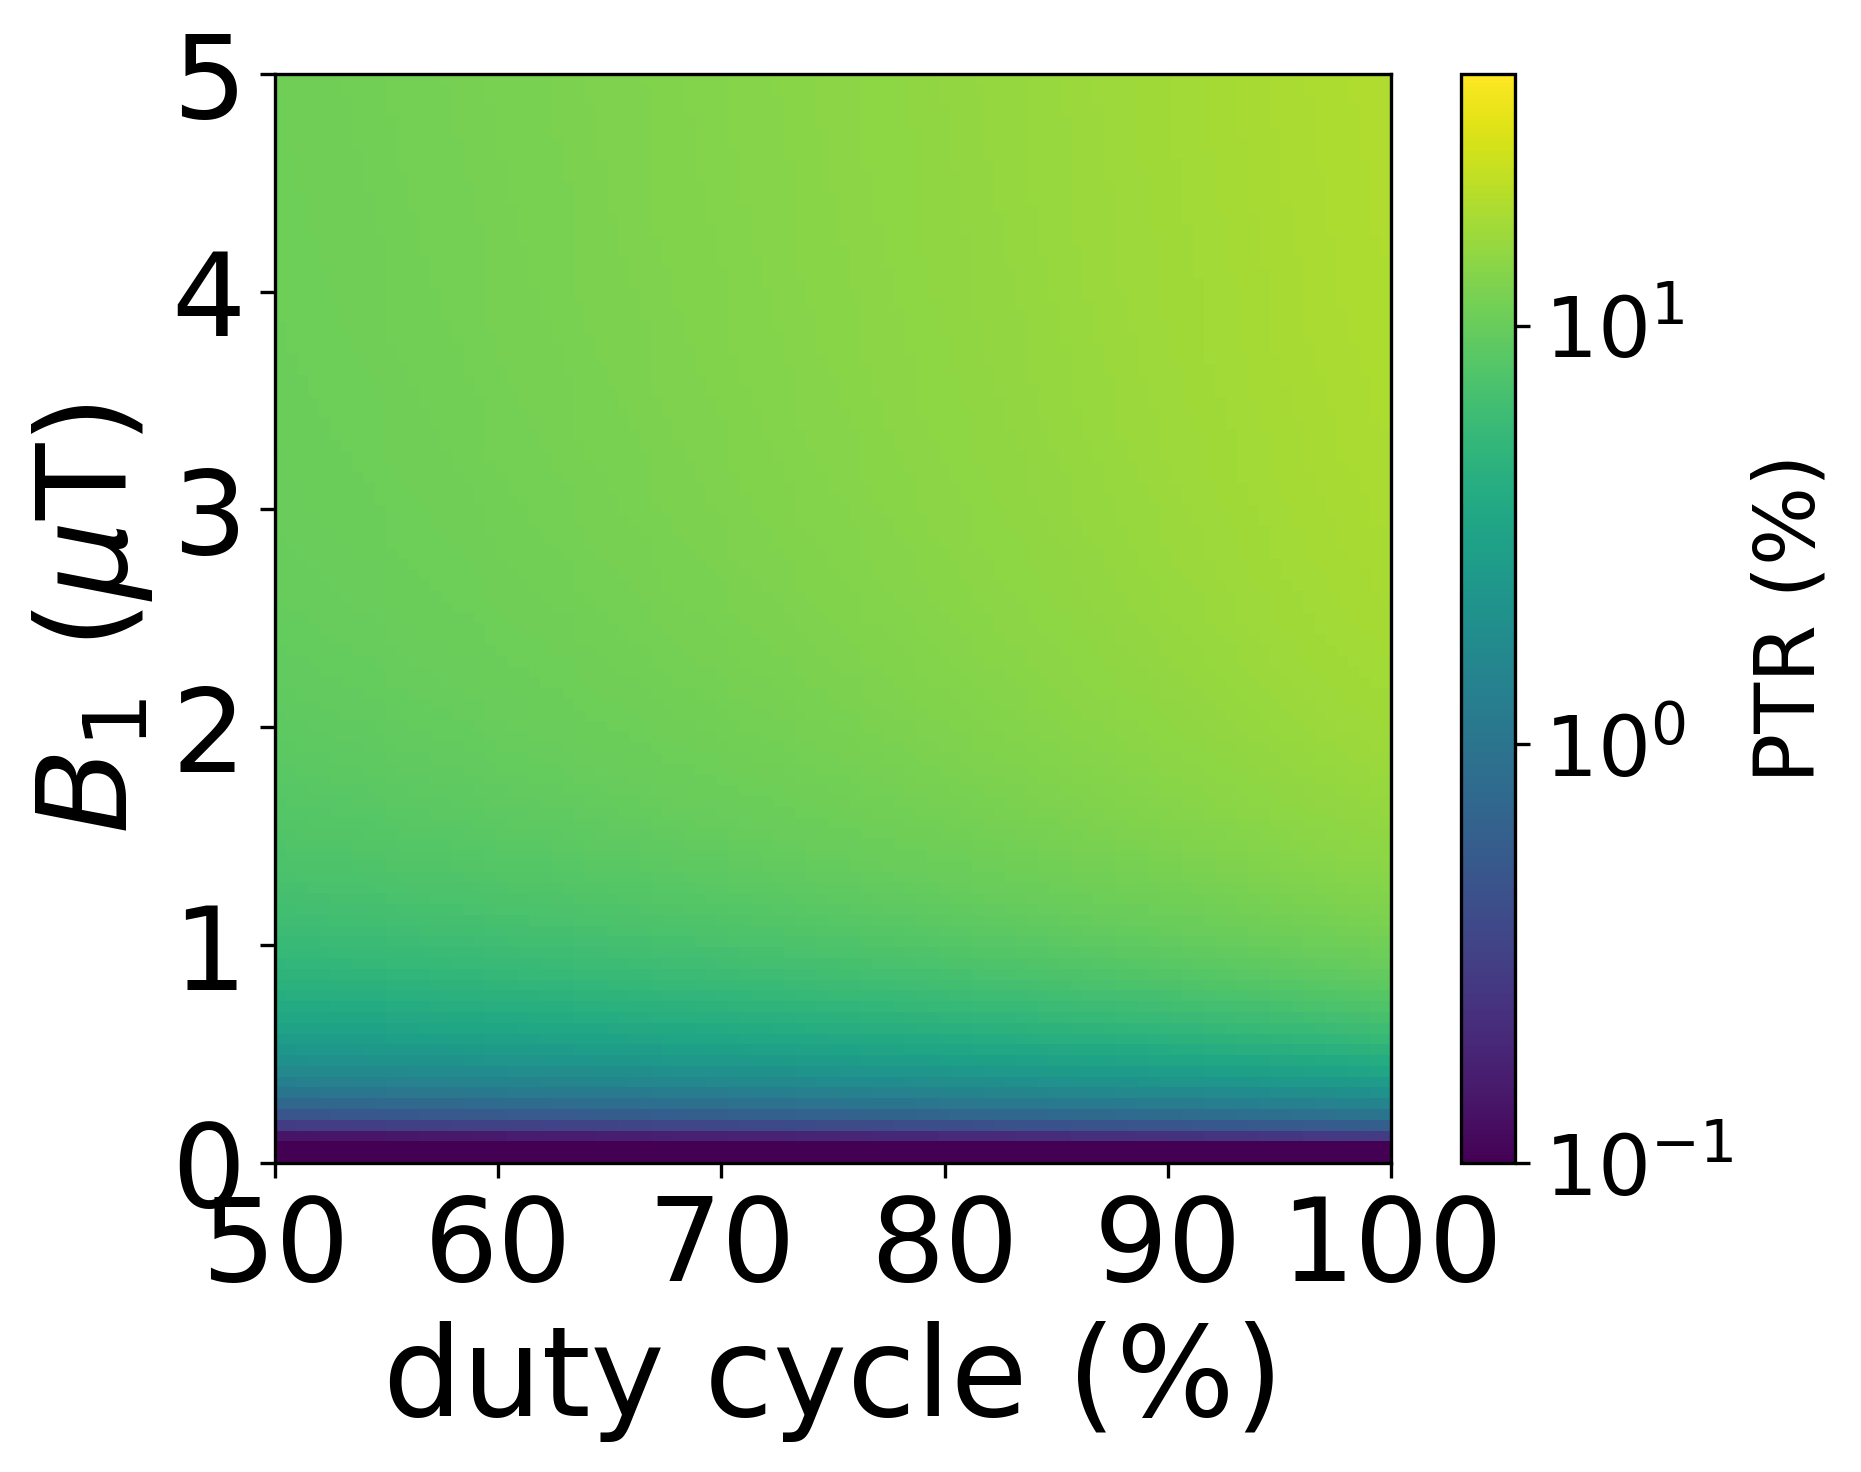

In [22]:
# contourf(X, Y, max_contrast[2], 5, cmap='RdGy')
fig, ax = plt.subplots(figsize=(6,4.81),dpi=300)

X=pulse_delays
Y=pulse_amplitudes

im = ax.imshow(100*(1-saturation_factors[1, :,:,0]), norm=LogNorm(vmin=0.1, vmax=40), extent=[50,100,0,5.], aspect='auto', origin='lower')
ax.set_facecolor("#440154FF")
cbar = fig.colorbar(im, ticks=[0.1,1, 10,100])
cbar.ax.tick_params(labelsize=20) 
cbar.set_label(r'PTR (%)', fontsize=20)

# y_label_list = [' ',' ','  ',' ',' ',' ']
# ax.set_yticklabels(y_label_list, fontsize=28)
# x_label_list = [' ',' ',' ','  ','  ',' ']
# ax.set_xticklabels(x_label_list, fontsize=28)

y_label_list = ['0','1','2','3','4','5']
ax.set_yticklabels(y_label_list, fontsize=28)
x_label_list = ['50','60','70','80','90','100']
ax.set_xticklabels(x_label_list, fontsize=28)


plt.ylabel('$B$$_{1}}$ ($\mu$T)', fontsize=30)
plt.xlabel('duty cycle (%)', fontsize=30)
# plt.title('saturation efficiency ($\\alpha$)', fontsize=25)
# l(r'$\lambda$')

plt.show()


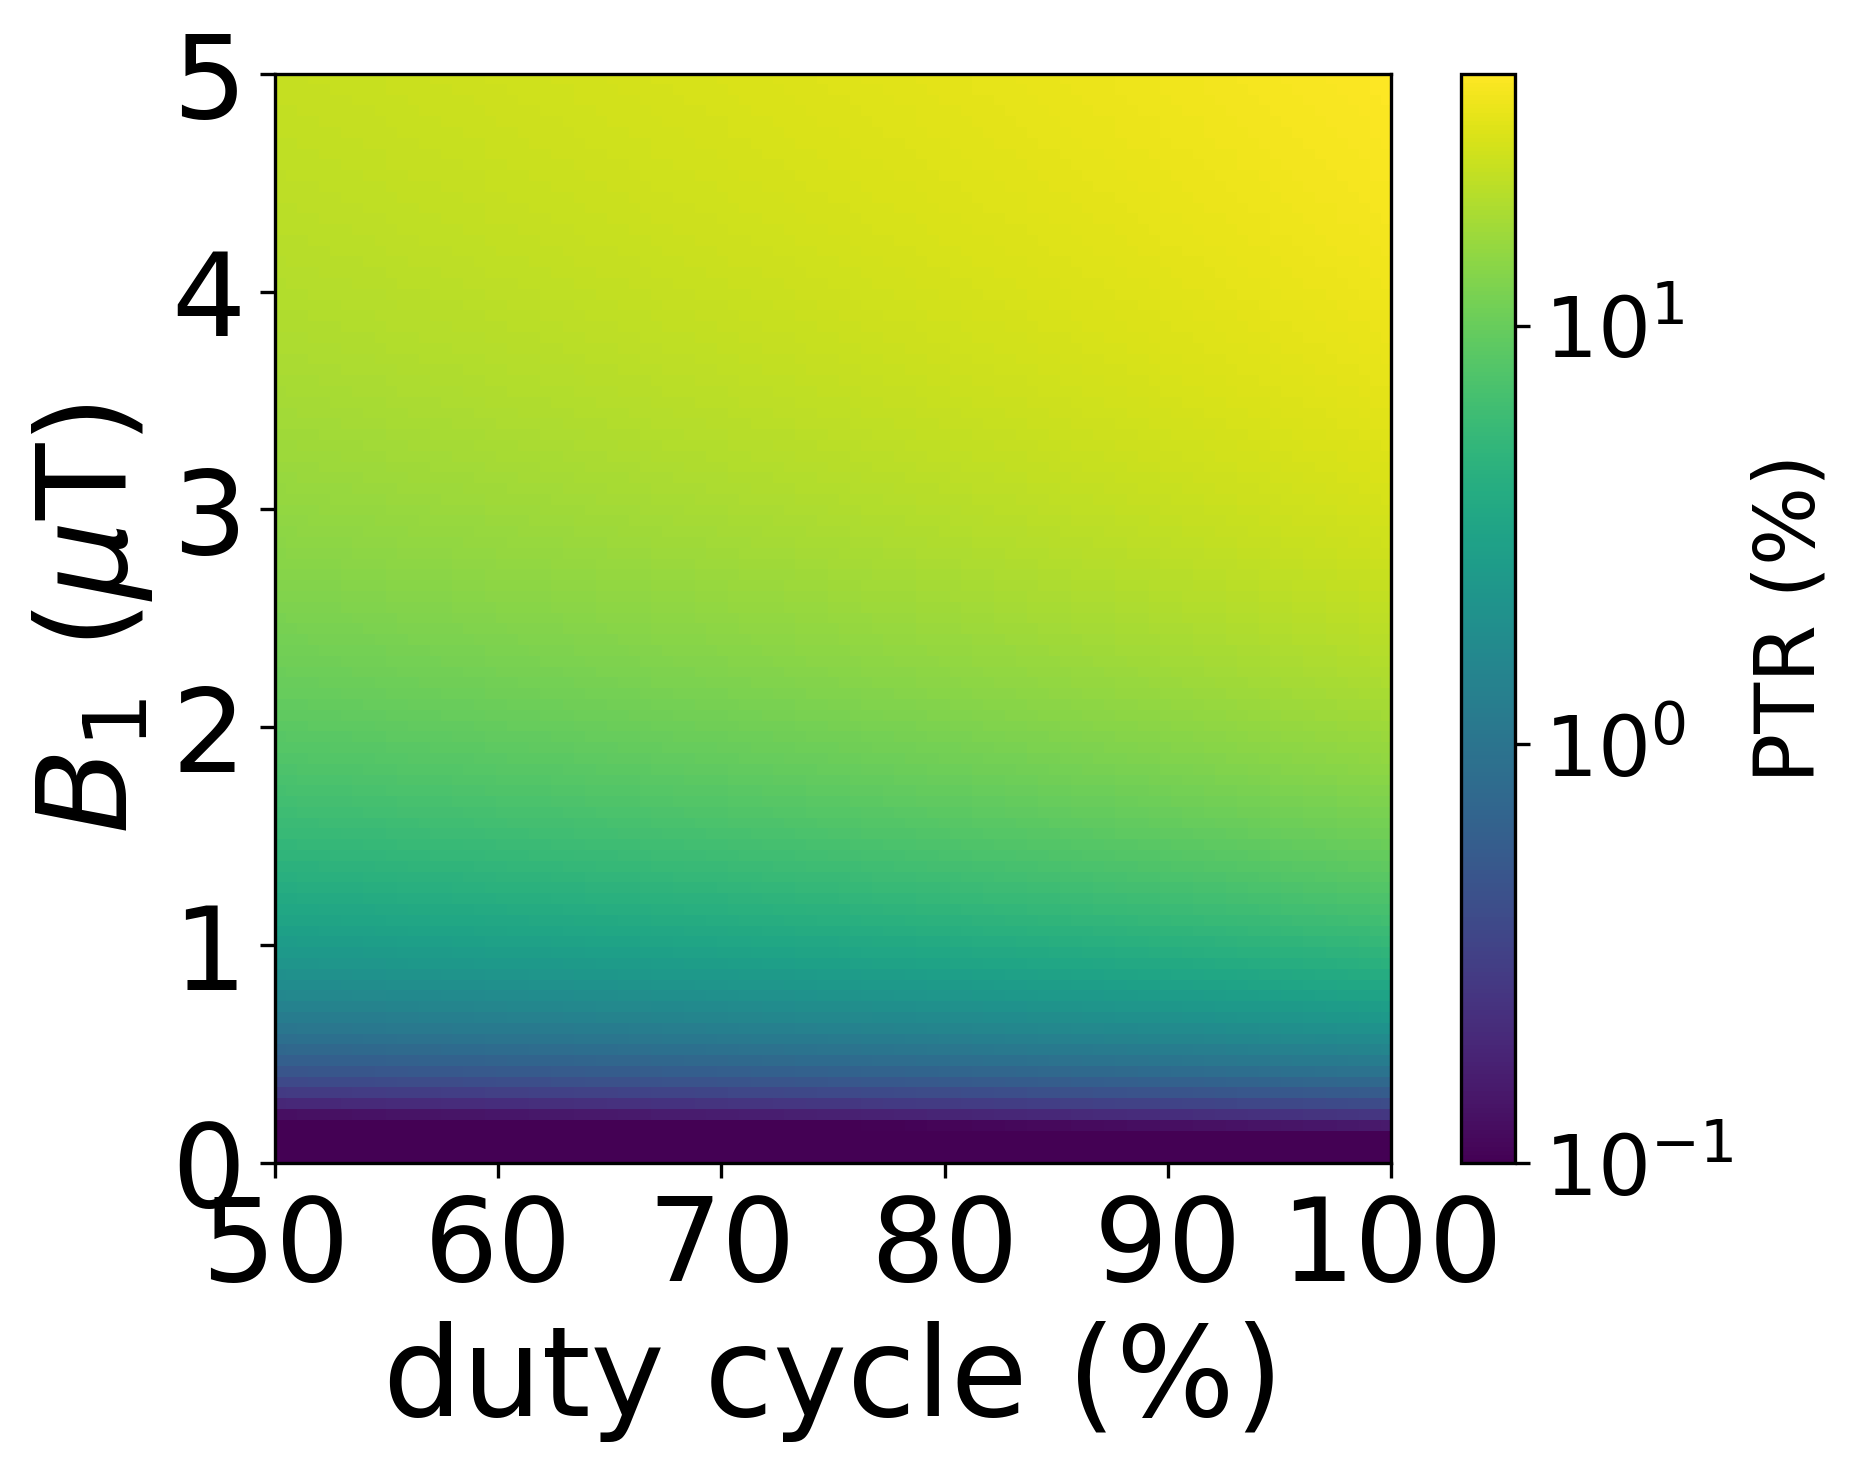

In [23]:
# contourf(X, Y, max_contrast[2], 5, cmap='RdGy')
fig, ax = plt.subplots(figsize=(6,4.81),dpi=300)

X=pulse_delays
Y=pulse_amplitudes

im = ax.imshow(100*(1-saturation_factors[2, :,:,0]), norm=LogNorm(vmin=0.1, vmax=40), extent=[50,100,0,5.], aspect='auto', origin='lower')
ax.set_facecolor("#440154FF")
cbar = fig.colorbar(im, ticks=[0.1,1, 10,100])
cbar.ax.tick_params(labelsize=20) 
cbar.set_label(r'PTR (%)', fontsize=20)

# y_label_list = [' ',' ','  ',' ',' ',' ']
# ax.set_yticklabels(y_label_list, fontsize=28)
# x_label_list = [' ',' ',' ','  ','  ',' ']
# ax.set_xticklabels(x_label_list, fontsize=28)

y_label_list = ['0','1','2','3','4','5']
ax.set_yticklabels(y_label_list, fontsize=28)
x_label_list = ['50','60','70','80','90','100']
ax.set_xticklabels(x_label_list, fontsize=28)


plt.ylabel('$B$$_{1}}$ ($\mu$T)', fontsize=30)
plt.xlabel('duty cycle (%)', fontsize=30)
# plt.title('saturation efficiency ($\\alpha$)', fontsize=25)
# l(r'$\lambda$')

plt.show()


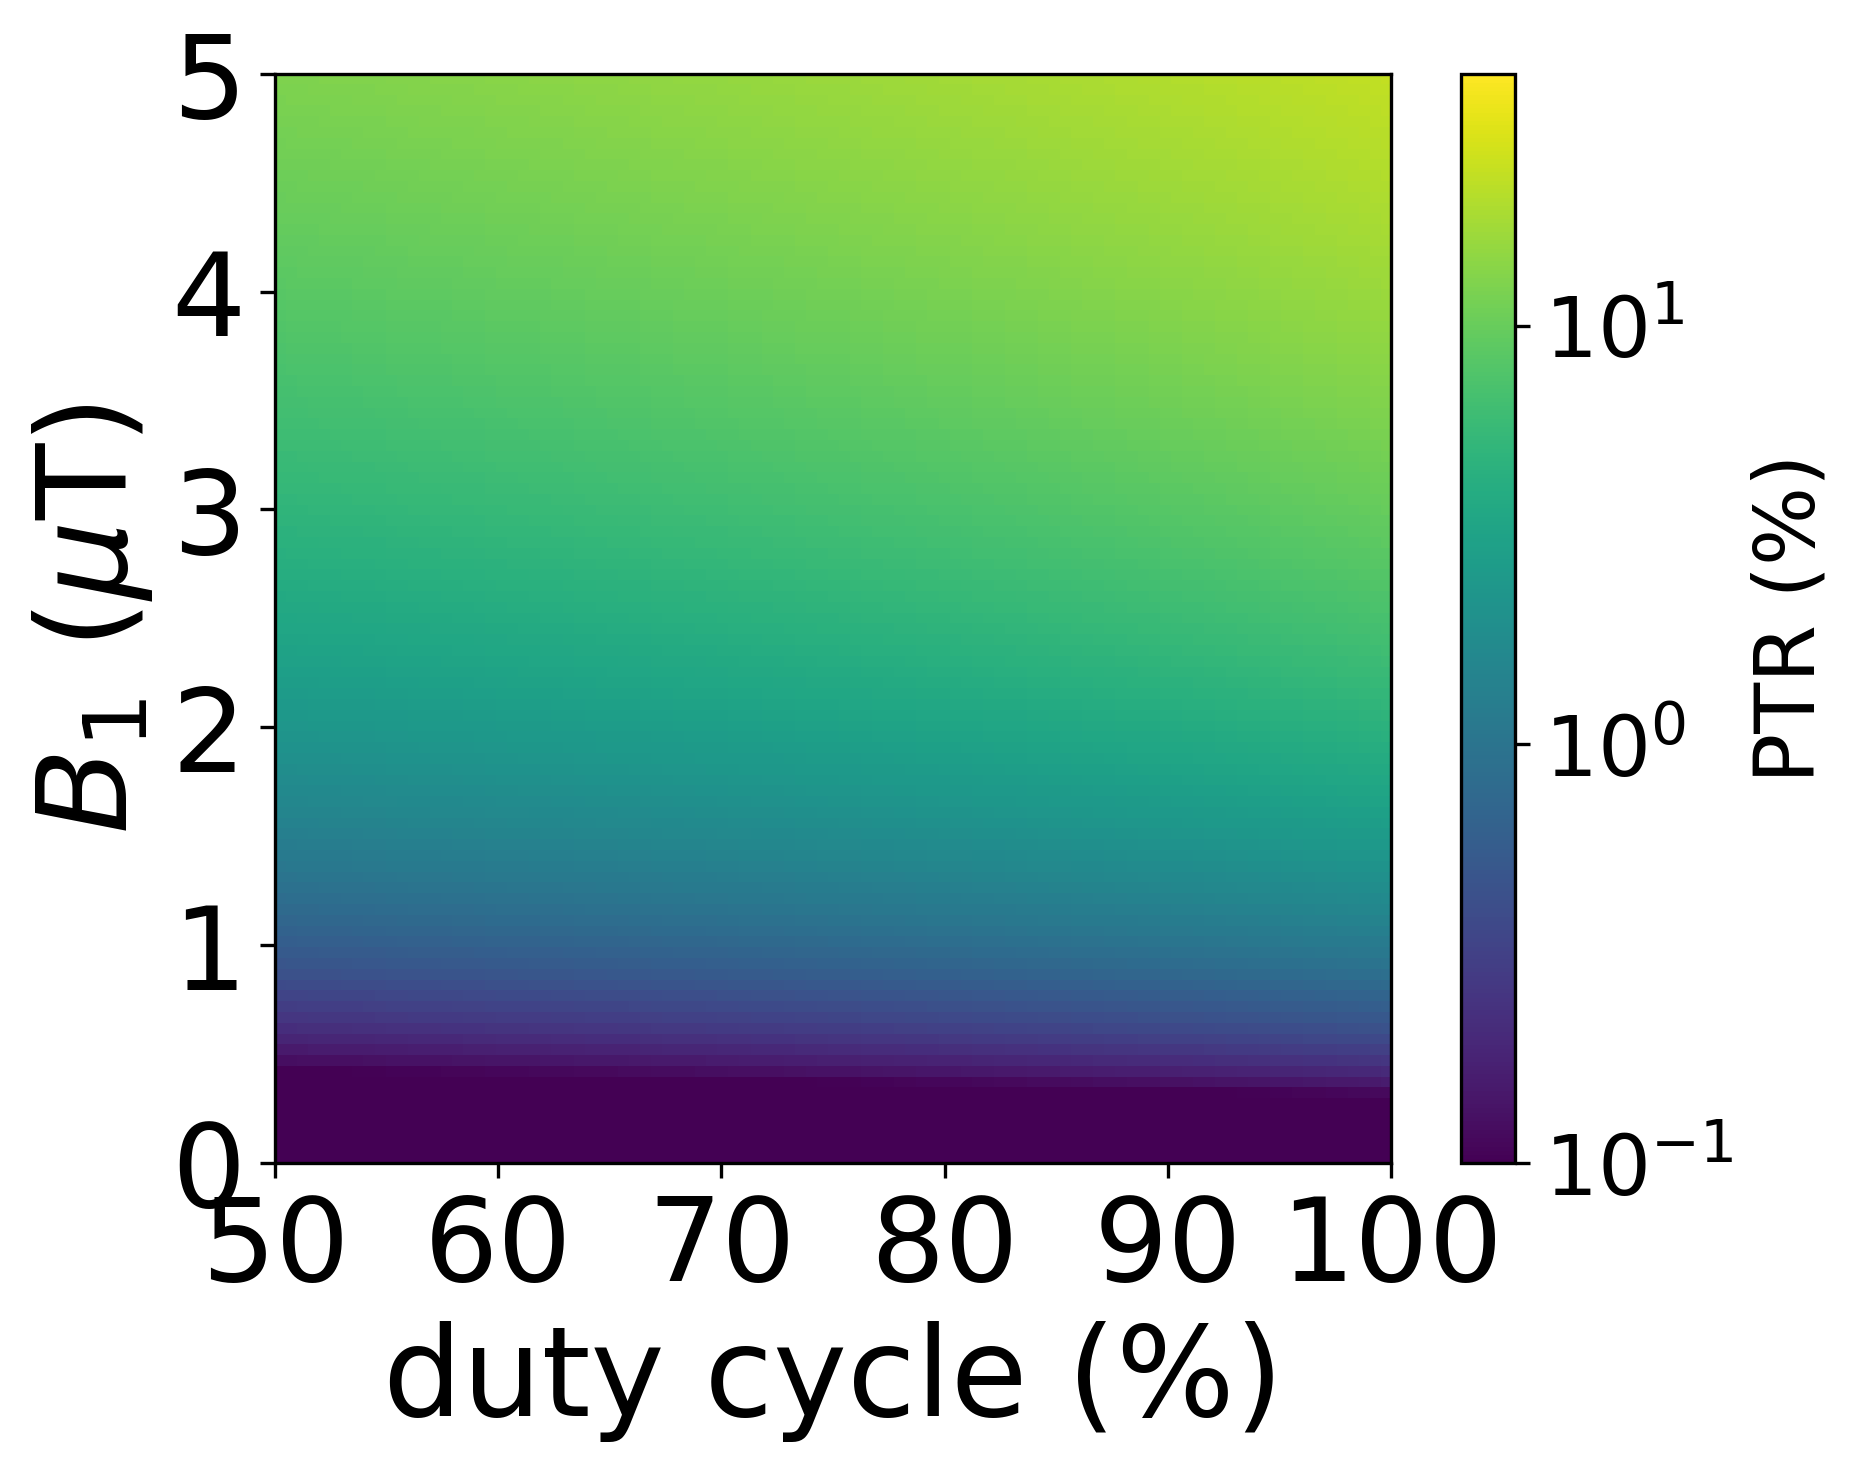

In [24]:
# contourf(X, Y, max_contrast[2], 5, cmap='RdGy')
fig, ax = plt.subplots(figsize=(6,4.81),dpi=300)

X=pulse_delays
Y=pulse_amplitudes

im = ax.imshow(100*(1-saturation_factors[3, :,:,0]), norm=LogNorm(vmin=0.1, vmax=40), extent=[50,100,0,5.], aspect='auto', origin='lower')
ax.set_facecolor("#440154FF")
cbar = fig.colorbar(im, ticks=[0.1,1, 10,100])
cbar.ax.tick_params(labelsize=20) 
cbar.set_label(r'PTR (%)', fontsize=20)

# y_label_list = [' ',' ','  ',' ',' ',' ']
# ax.set_yticklabels(y_label_list, fontsize=28)
# x_label_list = [' ',' ',' ','  ','  ',' ']
# ax.set_xticklabels(x_label_list, fontsize=28)

y_label_list = ['0','1','2','3','4','5']
ax.set_yticklabels(y_label_list, fontsize=28)
x_label_list = ['50','60','70','80','90','100']
ax.set_xticklabels(x_label_list, fontsize=28)


plt.ylabel('$B$$_{1}}$ ($\mu$T)', fontsize=30)
plt.xlabel('duty cycle (%)', fontsize=30)
# plt.title('saturation efficiency ($\\alpha$)', fontsize=25)
# l(r'$\lambda$')

plt.show()
